#### IRIS 꽃받침 길이, 너비, 꽃잎 길이기반 너비 예측 모델 + 교차 검증 
- 데이터셋 : iris.csv
- 학습종류 : 지도학습 / 회귀Regression - 값을 예측
- 알고리즘 : 분석 후 결정
- 피쳐 3개
- 타겟 : 꽃잎 너비
- 검증 : 5개 교차검증 진행



[1] 모듈 로딩 및 데이터 준비

In [383]:
## 1-1
import pandas as pd
# 데이터 분석 및 전처리
import numpy as np
# 숫자처리
import matplotlib.pyplot as plt
# 데이터 시각화

from sklearn.linear_model import LinearRegression
                            ## ML 알고리즘
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
                            ## 성능평가 모듈
from sklearn.model_selection import train_test_split, KFold
                            ## 데이터셋 분리 관련 모듈
                            ## 학습/검증/테스트 
                                                    ## 교차검증

[2] 데이터분석 -탐색적 분석

In [384]:
## 데이터준비

data_file = '../data/iris.csv'
irishDF = pd.DataFrame(pd.read_csv(data_file, usecols=[0,1,2,3], engine='python'))
irishDF.columns = ['s_length', 's_width', 'p_length', 'p_width']
irishDF.isnull().sum()

s_length    0
s_width     0
p_length    0
p_width     0
dtype: int64

In [385]:

feature = irishDF[['s_length','p_length' ]]
feature1 = irishDF['s_length']
feature2 = irishDF['s_width']
feature3 = irishDF['p_length']
target = irishDF['p_width']


[2] 데이터분석 -탐색적 분석

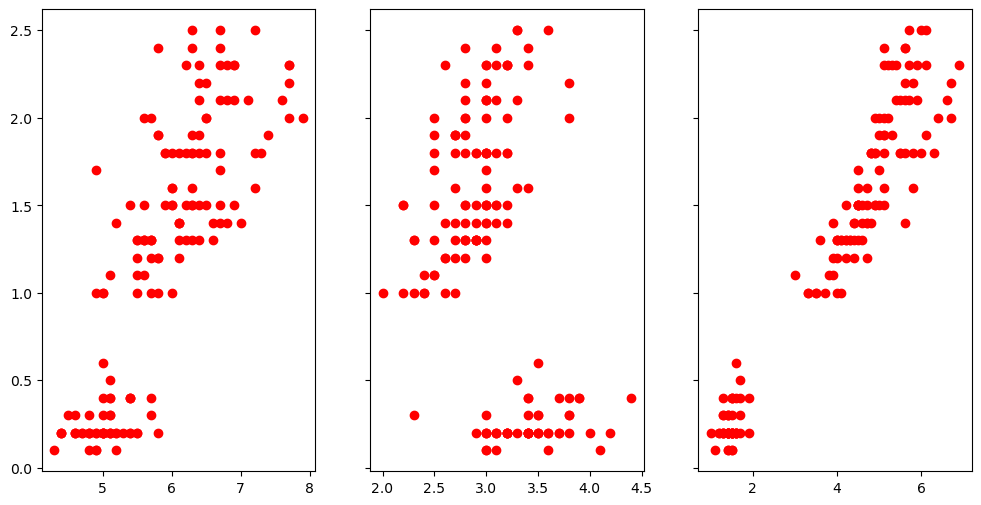

In [386]:
## 무게와 길이의 분포
fig, ax = plt.subplots(1,3, sharey = True,figsize = (12,6))
ax[0].plot(feature1, target,'or')
ax[1].plot(feature2, target,'or')
ax[2].plot(feature3, target,'or')
plt.show()

- 탐색적 데이터 분석 결과
    - 데이터 분포 분석: s_lenght, p_length에 따른 너비가 증가하는 양상 보임
    - 데이터 상관 계수: s_length, p_length가 관계성이 높음
    - 알고리즘 선형회귀로 진행
    - 선택 피쳐 : s_lenght, p_length
    - 주의 : 품종에 따라서 길이가 모여 있음.


[3] 데이터셋 준비
- 학습용 데이터셋 : 학습에만 사용되는 데이터셋 => 해당 데이터셋에서 피쳐와 타겟의 규칙/패턴 찾기
- 검증용 데이터셋 : 학습 중 규칙/패턴 제대로 학습 여부 검사용
- 테스트용 데이터셋 : 모델 완성 후 테스트용 데이터셋
- scikit-learn 패키지 특성으로 학습용과 테스트용만 사용

In [387]:
## 3-1 피처와 타겟 분리
featureDF = feature
targetSR = target
print(f"featureDF => {featureDF.ndim}D, targetSr => {targetSR.ndim}D")

featureDF => 2D, targetSr => 1D


In [416]:
## 학습용 : 테스트용 = 9:1
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size=0.2,
                                                    random_state=24)
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape}, / y_test => {y_test.ndim}D, {y_test.shape}")

X_train => 2D (120, 2) / X_test => 2D, (30, 2)
y_train => 1D (120,), / y_test => 1D, (30,)


### 4 학습진행

In [417]:
## 교차검증 객체 생성 5개 분할 - default
kf = KFold(n_splits=5)

## 선형회귀모델 객체 생성성
lr = LinearRegression()

# kf.get_n_splits(X_train, y_train)

In [418]:
# ## 2개로 분할된 데이터셋 확인.
# for i, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
#     print(f"Fold {i}:")
#     print(f"  Train: index={train_index}")
#     print(f"  Test:  index={test_index}")


In [419]:
resultDF = pd.DataFrame(columns = ['score','loss'])

In [420]:
r_dict = {x:[] for x in ['train_score', 'test_score', 'train_loss','test_loss']}

In [ ]:
for train_index, test_index in (kf.split(irishDF)):
    # X_train, X_test = irishDF.iloc[train_index], irishDF[test_index]
    pass
    print(1)
    

1
1
1
1
1


In [455]:
for i, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
# for i, (train_index, test_index) in enumerate(kf.split(featureDF, targetSR)):
    print(f"Fold {i}")
    # print(test_index in y_test.index)
    ## 학습용 / 테스트용 피쳐와 타겟 추출
    train_data, train_label = X_train.iloc[train_index], y_train.iloc[train_index]
    test_data, test_label = X_train.iloc[test_index], y_train.iloc[test_index]
    # # print(train_data.columns)
    
    #학습
    lr.fit(train_data, train_label)
    
    train_score = lr.score(train_data, train_label)
    test_score = lr.score(test_data, test_label)
    
    train_loss = root_mean_squared_error(train_label, lr.predict(train_data))
    test_loss = root_mean_squared_error(test_label, lr.predict(test_data))
    
    resultDF.loc[f"Fold_{i}_Train"] = [train_score, train_loss]
    resultDF.loc[f"Fold_{i}_test"] = [test_score, test_loss]

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4


In [456]:
resultDF

,score,loss
Fold_0_Train,0.934743,0.181377
Fold_0_test,0.906926,0.204465
Fold_1_Train,0.938555,0.180520
Fold_1_test,0.892479,0.205413
Fold_2_Train,0.927817,0.196202
Fold_2_test,0.955827,0.133754
Fold_3_Train,0.920783,0.197479
Fold_3_test,0.969285,0.129232
Fold_4_Train,0.942434,0.164257
Fold_4_test,0.881562,0.257309


In [423]:
test_index, y_test.index

(array([24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
        41, 42, 43, 44, 45, 46, 47]),
 Index([107, 114,  57,  59, 105,  11,  48,  72,  29, 148,  30,  19,  26, 111,
        144,  14, 103,  31, 104, 120, 112, 140, 135,  51, 136,   1, 108, 137,
         49, 109],
       dtype='int64'))

In [424]:
len(X_train), len(train_index)

(120, 96)

In [425]:
len(test_index),len(y_test),

(24, 30)

In [426]:
resultDF

,score,loss


[5] 테스트수행 <hr>
- 테스트 데이터셋 진행


In [427]:
from sklearn.metrics import r2_score

In [457]:
## 예측값 추출
pre_ = lr.predict(X_test)
# score = r2_score(y_test, pre_)
# rmse = root_mean_squared_error(y_test, pre_)

# print(score,rmse)

[6] 모델활용/ 서비스

In [461]:
## 사용자로부터 입력 받기
print("품종조회")
new_data = input("입력").split(',')
print(new_data)

new_data = [int(data) for data in new_data]
print(new_data)



품종조회
['4', '5']
[4, 5]


In [462]:
## 예측결과 출력
dataDF = pd.DataFrame([new_data], columns=['s_length', 'p_length'])
dataDF

,s_length,p_length
0,4,5


In [463]:
lr.predict(dataDF)

array([1.84471343])